<a href="https://colab.research.google.com/github/FarahYusri12/Learning-pyhton/blob/main/Jualan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df=pd.read_csv('Jualan.csv')

In [7]:
#untuk baca 5 baris pertama
df.head()

,Tarikh,Negeri,Produk,Jumlah
0,2024-01-02,Selangor,A,120
1,2024-01-05,Johor,B,90
2,2024-01-06,Selangor,B,70
3,2024-02-01,Johor,A,110
4,2024-02-10,Sabah,C,200


In [5]:
# untuk lihat maklumat ringkas data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tarikh  6 non-null      object
 1   Negeri  6 non-null      object
 2   Produk  6 non-null      object
 3   Jumlah  6 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 324.0+ bytes


In [6]:
#statistik diskriptif
df.describe()

,Jumlah
count,6.000000
mean,123.333333
std,46.332134
min,70.000000
25%,95.000000
50%,115.000000
75%,142.500000
max,200.000000


In [10]:
# Since data type untuk tarik adalah objek, kene tukar ke data type jenis datetime
df['Tarikh'] = pd.to_datetime(df['Tarikh'])

# Semak semula guna df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Tarikh  6 non-null      datetime64[ns]
 1   Negeri  6 non-null      object        
 2   Produk  6 non-null      object        
 3   Jumlah  6 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 324.0+ bytes


In [12]:
# Kira jumlah jualan mengikut negeri
Jualan_Ikut_Negeri = df.groupby('Negeri')['Jumlah'].sum()
print(Jualan_Ikut_Negeri)

Negeri
Johor       200
Sabah       200
Selangor    340
Name: Jumlah, dtype: int64


In [15]:
# Nak susun Jualan ikut negeri dari tinggi ke rendah (descending order)
# Simplify jualan ikut negeri descending jadi JIKD
JIKD = Jualan_Ikut_Negeri.sort_values(ascending=False)
print("Jumlah Jualan Mengikut Negeri (Descending)")
print(JIKD)

Jumlah Jualan Mengikut Negeri (Descending)
Negeri
Selangor    340
Johor       200
Sabah       200
Name: Jumlah, dtype: int64


In [20]:
# Buat column baru dengan iaitu column bulan dgn mengekstrak bulan dari column Tarikh
# Bulan dalam column Bulan akan dipaparkan dgn nama bulan yang penuh
df ['Bulan'] = df['Tarikh'].dt.month_name()
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Tarikh  6 non-null      datetime64[ns]
 1   Negeri  6 non-null      object        
 2   Produk  6 non-null      object        
 3   Jumlah  6 non-null      int64         
 4   Bulan   6 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 372.0+ bytes
None
      Tarikh    Negeri Produk  Jumlah     Bulan
0 2024-01-02  Selangor      A     120   January
1 2024-01-05     Johor      B      90   January
2 2024-01-06  Selangor      B      70   January
3 2024-02-01     Johor      A     110  February
4 2024-02-10     Sabah      C     200  February


In [21]:
# Kira jumlah jualan ikut bulanan
Jualan_Ikut_Bulanan = df.groupby('Bulan')['Jumlah'].sum()
print(Jualan_Ikut_Bulanan)

Bulan
February    310
January     280
March       150
Name: Jumlah, dtype: int64


In [30]:
#kira jumlah jualan bulanan mengikut negeri
Jualan_Bulan_Negeri = df.groupby(['Bulan', 'Negeri'])['Jumlah'].sum().reset_index()

#Susun bulan mengikut urutan yang betul supaya graf tidak mengikut susunan abjad bulan
Bulan_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
Jualan_Bulan_Negeri['Bulan'] = pd.Categorical(Jualan_Bulan_Negeri['Bulan'], categories=Bulan_order, ordered=True)
Jualan_Bulan_Negeri = Jualan_Bulan_Negeri.sort_values('Bulan')
print(Jualan_Bulan_Negeri)

      Bulan    Negeri  Jumlah
2   January     Johor      90
3   January  Selangor     190
0  February     Johor     110
1  February     Sabah     200
4     March  Selangor     150


In [22]:
#untuk visualization kene import matplotlib.pyplot dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

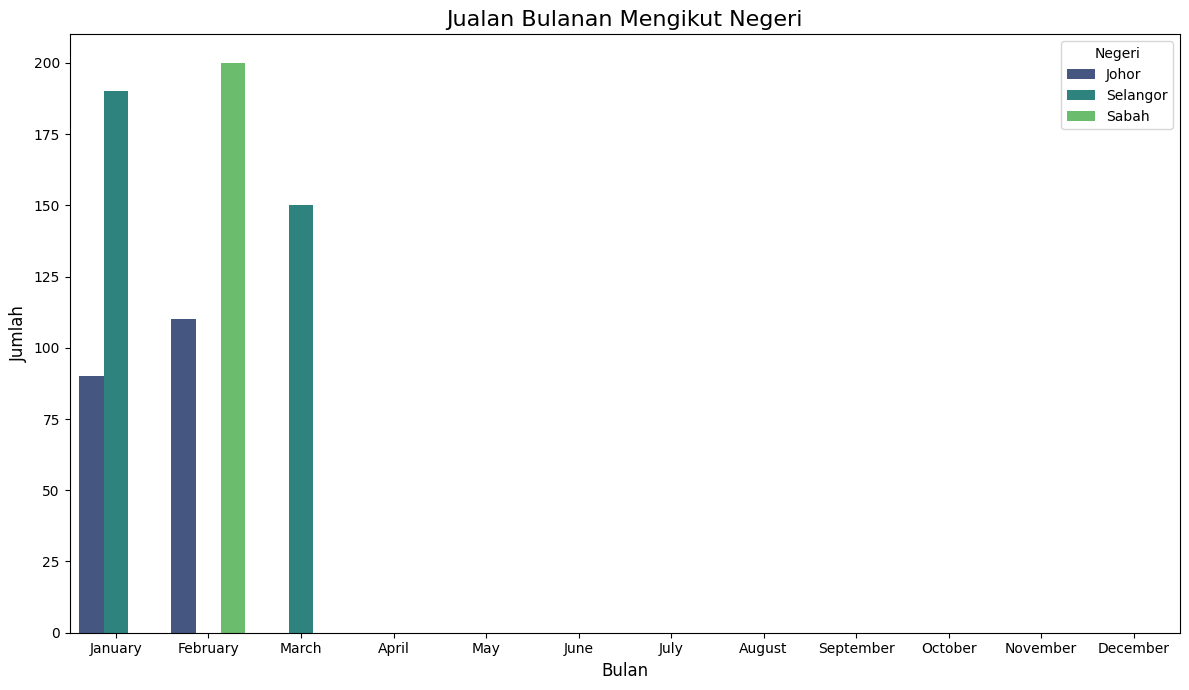

In [33]:
#Tetapkan saiz graf
plt.figure(figsize=(12,7))

# Menggunakan graf barplot atau line plot
sns.barplot(data=Jualan_Bulan_Negeri, x='Bulan', y='Jumlah', hue='Negeri', palette='viridis')

#Tajuk graf
plt.title('Jualan Bulanan Mengikut Negeri', fontsize=16)

#Label X axis
plt.xlabel('Bulan', fontsize=12)

#Label Y axis
plt.ylabel('Jumlah', fontsize=12)

#Sesuaikan layout supaya label tak terpotong
plt.tight_layout()

#Paparkan graf
plt.show()